In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [3]:
home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [4]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()
sc_data_choice_level = data_choice_level[data_choice_level['condition']==1].reset_index()

# Basic counts

## histogram of number of cities within reach

<IPython.core.display.Javascript object>


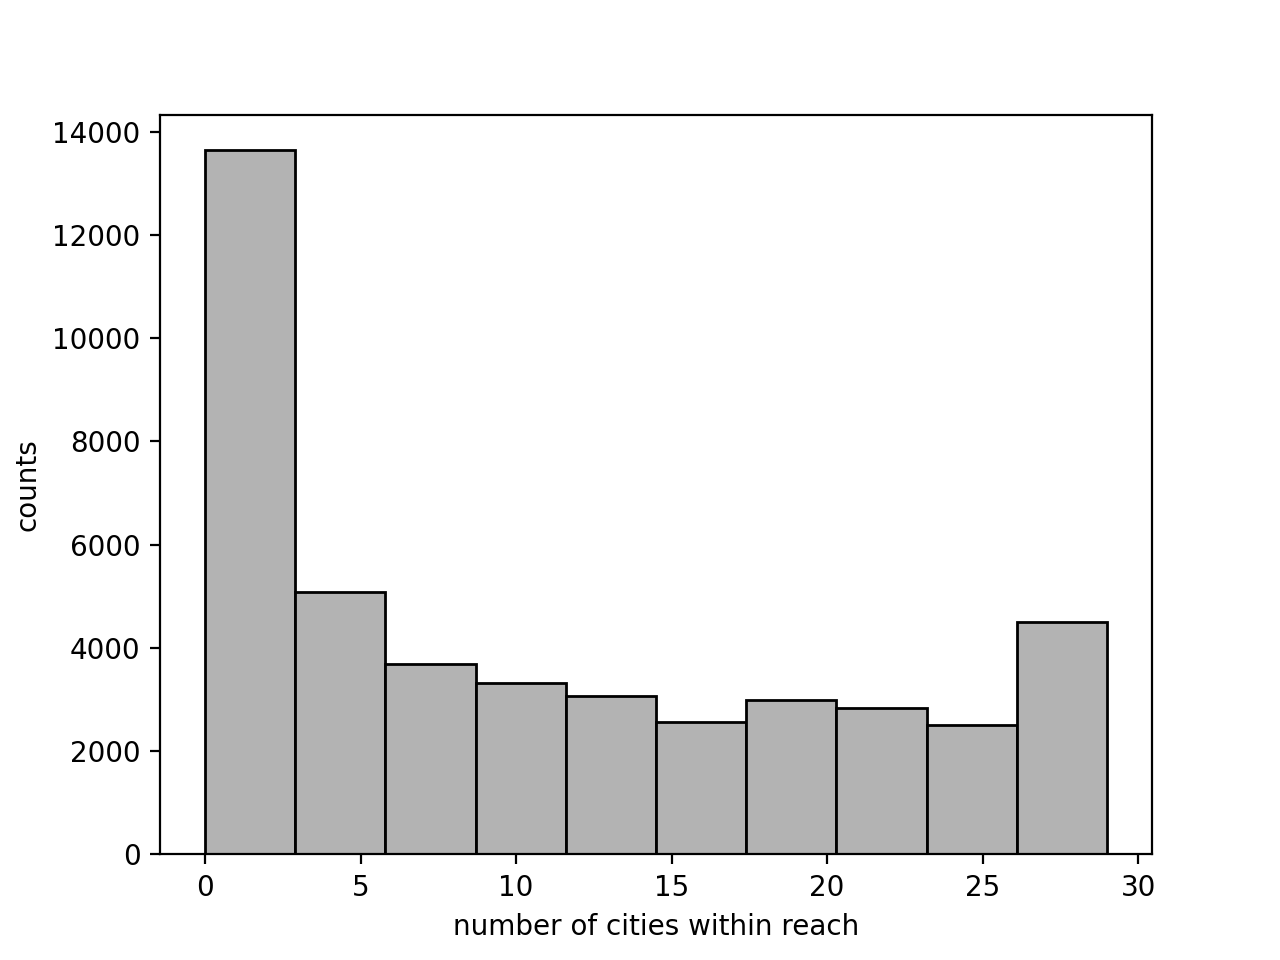

In [18]:
n_reach = data_choice_level[data_choice_level['condition']==0]['within_reach'] # only basic condition

%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.hist(n_reach,
        color = (.7,.7,.7), 
        edgecolor = 'k',)
axs.set_ylabel('counts') 
axs.set_xlabel('number of cities within reach') 
plt.show()

## histogram of number of undos in a seq

<IPython.core.display.Javascript object>


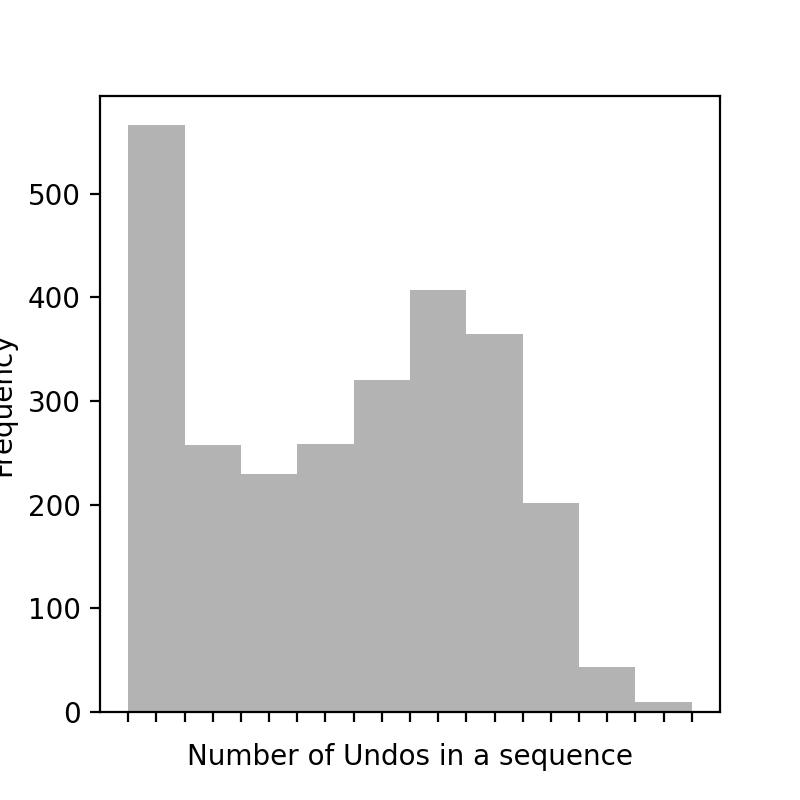

In [17]:
# histogram of number of undos in a sequence
num_undos = np.array(data_choice_level.index[data_choice_level['lastUndo']==1]) - np.array(data_choice_level.index[data_choice_level['firstUndo']==1]) + 1

%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.hist(num_undos, bins=10,color=[.7,.7,.7])
plt.ylabel('Frequency')
plt.xlabel('Number of Undos in a sequence')
axs.set_xticks(np.linspace(1,10,21))
axs.set_xticklabels('')

fig.set_figwidth(4)
fig.set_figheight(4)
# fig.savefig(out_dir + 'undo_num_seq.png', dpi=600, bbox_inches='tight')
# fig.savefig(out_dir + 'undo_num_seq.pdf', dpi=600, bbox_inches='tight')

# individual number of connected cities

In [6]:
numCity_basic = data_puzzle_level[data_puzzle_level['condition']==0].groupby(['subjects'])['numCities'].mean()
numCity_undo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numCities'].mean()
mas =  np.mean(data_puzzle_level['mas'])

<IPython.core.display.Javascript object>


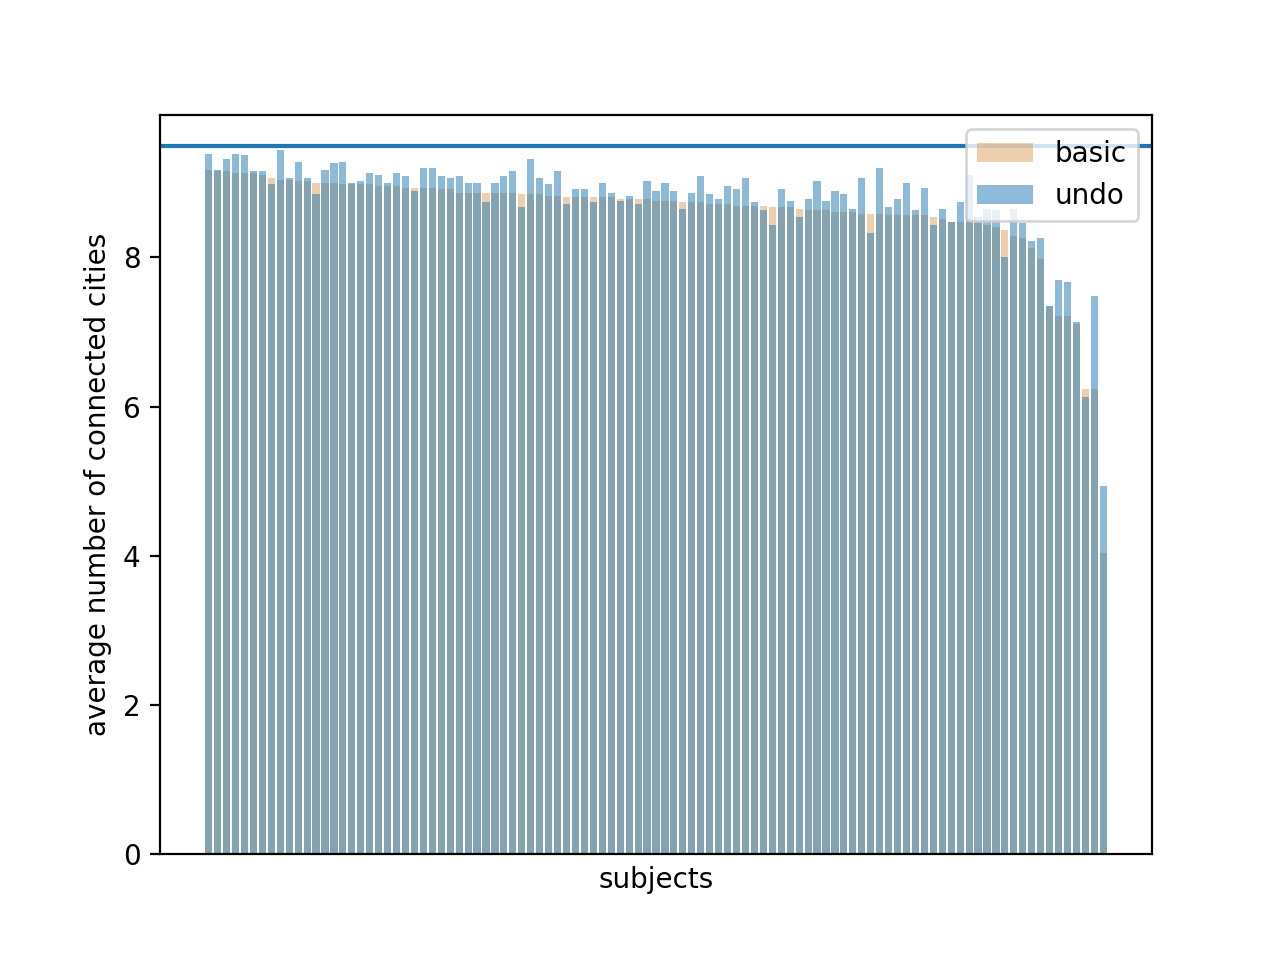

In [19]:
%matplotlib notebook

n_sub = len(numCity_basic)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(numCity_basic)),key=lambda k:list(numCity_basic)[k])]
sorted_numCity_undo = [numCity_undo[x] for x in subInd]
ax0.bar(list(range(1,n_sub+1)),sorted(numCity_basic),color = "#dda15e",alpha=0.5,label='basic')
ax0.bar(list(range(1,n_sub+1)),sorted_numCity_undo,alpha=0.5,label='undo')
ax0.axhline(mas)
ax0.invert_xaxis()
ax0.set_xticks([])
# ax0.set_xticklabels(subInd,{'fontsize': 6})
ax0.set_xlabel("subjects")
ax0.set_ylabel("average number of connected cities")
ax0.legend()
# fig0.suptitle('Relative change of count of defer in group condition compared to self condition')
# print('the mean of relative change in group level is:'+ str(statistics.mean(groupDeferRate)))
plt.show()
#fig0.savefig(out_dir + 'connected_individual.pdf', dpi=600, bbox_inches='tight')


# individual counts of undoing

## single undo

In [8]:
num_undo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numUNDO'].mean()

<IPython.core.display.Javascript object>


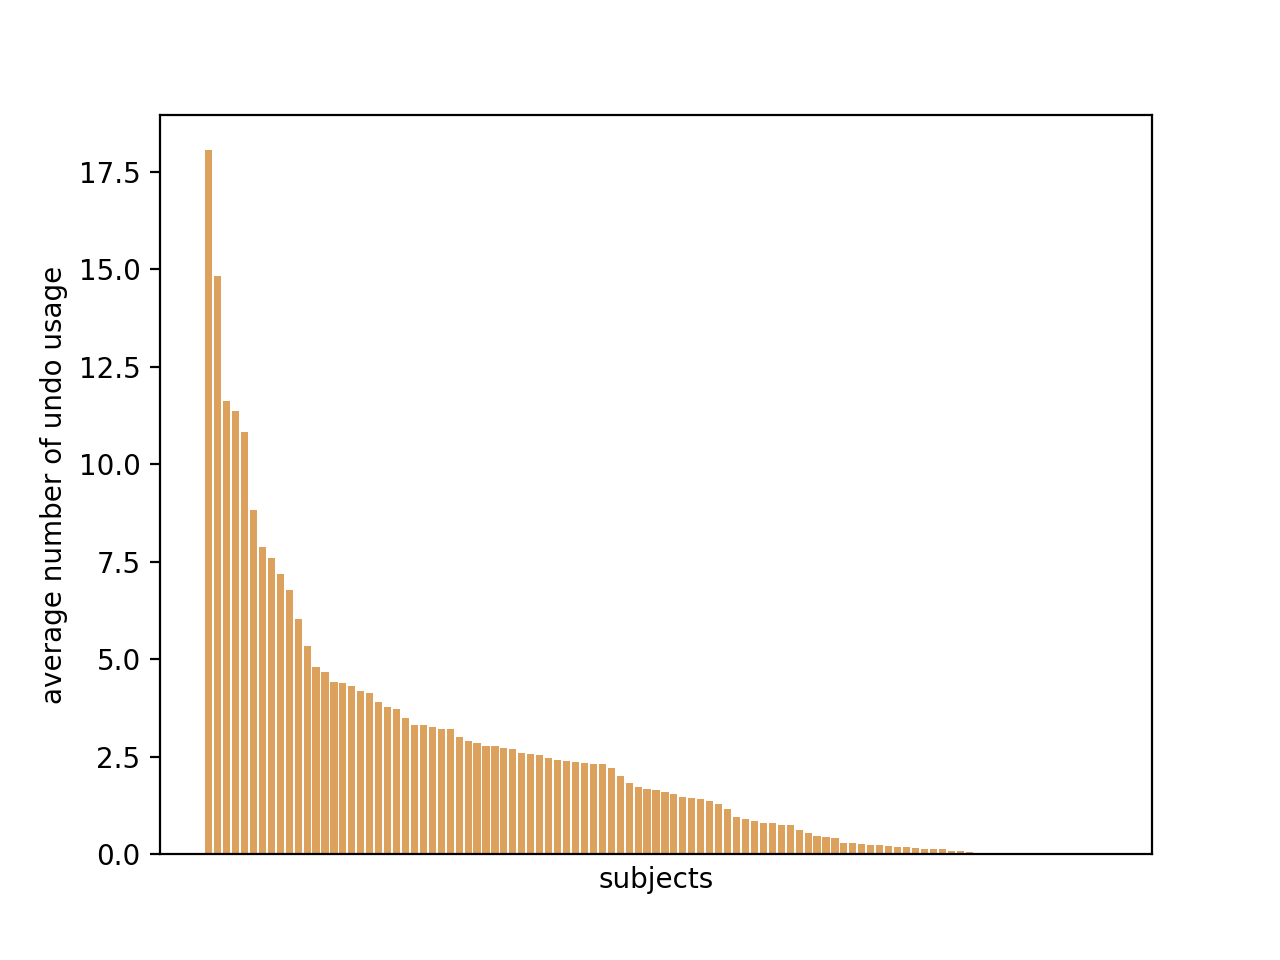

[]

In [20]:
%matplotlib notebook

n_sub = len(num_undo)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(num_undo)),key=lambda k:list(num_undo)[k])]
ax0.bar(list(range(1,n_sub+1)),sorted(num_undo),color = "#dda15e")
ax0.set_xlabel("subjects")
ax0.set_ylabel("average number of undo usage")
ax0.invert_xaxis()
ax0.set_xticks([])

## full undoing

In [10]:
numFullUndo = data_puzzle_level[data_puzzle_level['condition']==1].groupby(['subjects'])['numFullUndo'].mean()

<IPython.core.display.Javascript object>


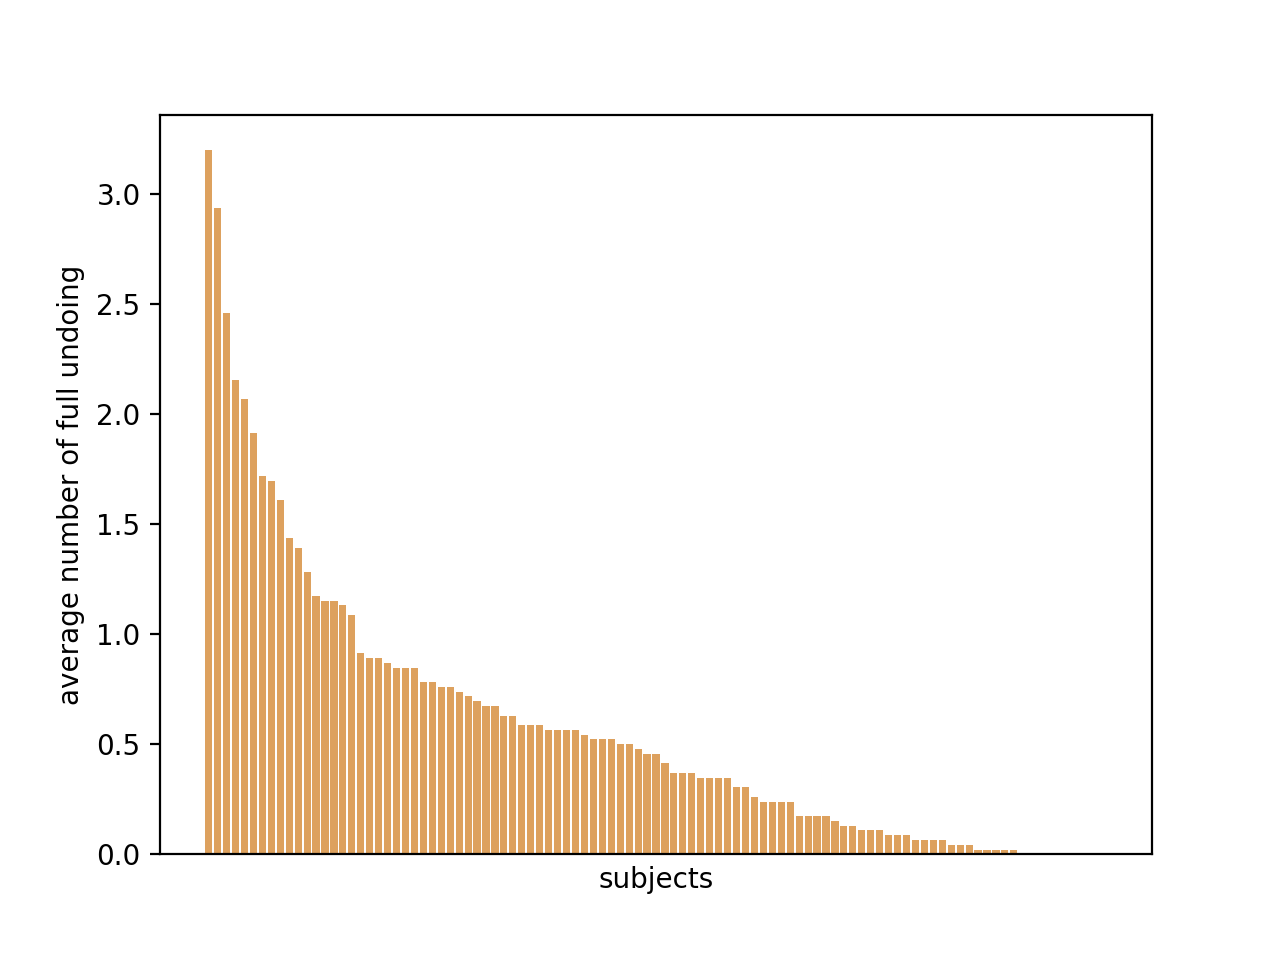

[]

In [21]:
%matplotlib notebook

n_sub = len(numFullUndo)
fig0, ax0 = plt.subplots()
subInd = [x+1 for x in sorted(range(len(numFullUndo)),key=lambda k:list(numFullUndo)[k])]
ax0.bar(list(range(1,n_sub+1)),sorted(numFullUndo),color = "#dda15e")
ax0.set_xlabel("subjects")
ax0.set_ylabel("average number of full undoing")
ax0.invert_xaxis()
ax0.set_xticks([])
# fig0.savefig(out_dir + 'full_undoing_individual.pdf', dpi=600, bbox_inches='tight')

## individual number of undoing presses and sequences 

In [12]:
np.unique(np.array(single_condition_data['numFullUndo'][single_condition_data['numUNDO']!=0]))
undo_once_count_sub = single_condition_data.groupby(['subjects'])['numUNDO'].mean()
undo_once_sequences = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()

In [25]:
undo_presses = np.array(single_condition_data.groupby(['subjects'])['numUNDO'].mean())
undo_length  = np.array(single_condition_data.groupby(['subjects'])['numUNDO'].mean())/np.array(single_condition_data.groupby(['subjects'])['numFullUndo'].mean())

undo_length[np.isnan(undo_length)] = 0

/var/folders/1f/jm7zf5792lvd000qt0vb8jmr5t6hzx/T/ipykernel_4905/2169366295.py:2: RuntimeWarning: invalid value encountered in true_divide
  undo_length  = np.array(single_condition_data.groupby(['subjects'])['numUNDO'].mean())/np.array(single_condition_data.groupby(['subjects'])['numFullUndo'].mean())


<IPython.core.display.Javascript object>


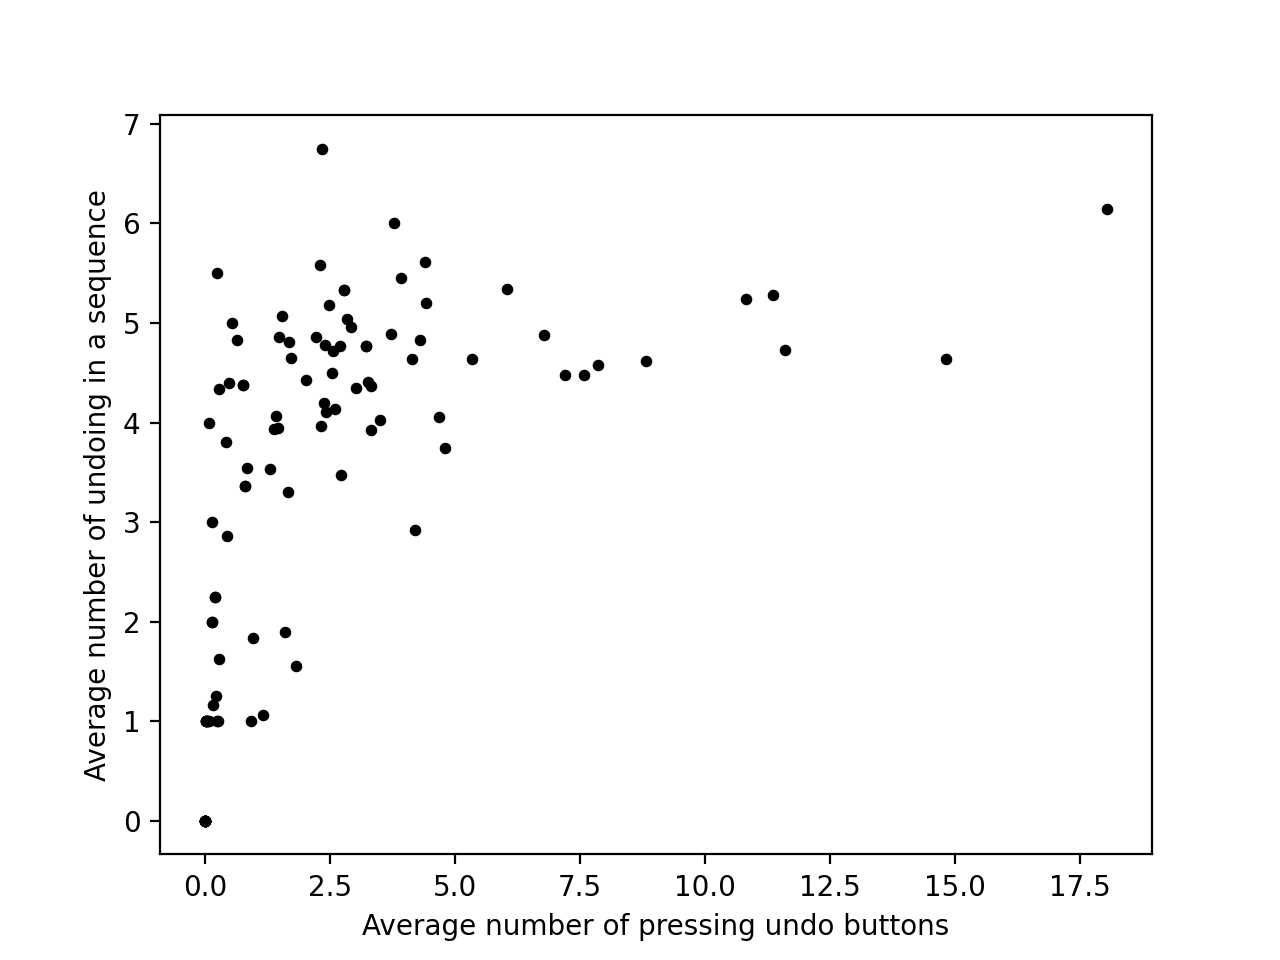

Text(0, 0.5, 'Average number of undoing in a sequence')

In [22]:
fig1, ax1 = plt.subplots()
# ax1.plot(undo_count_sub,undo_benefit_sub,'o',s=2,c='k')
ax1.scatter(undo_presses,undo_length,10,c='k')

ax1.set_xlabel('Average number of pressing undo buttons')
ax1.set_ylabel('Average number of undoing in a sequence')
# fig1.savefig(out_dir + 'undo_num_length.png', dpi=600, bbox_inches='tight')
# fig1.savefig(out_dir + 'undo_num_length.pdf', dpi=600, bbox_inches='tight')


In [16]:
from scipy.stats import spearmanr, pearsonr
# spearmanr(undo_presses,undo_length)
pearsonr(undo_presses,undo_length)

(0.540640028555387, 5.3461996302082566e-09)

<IPython.core.display.Javascript object>


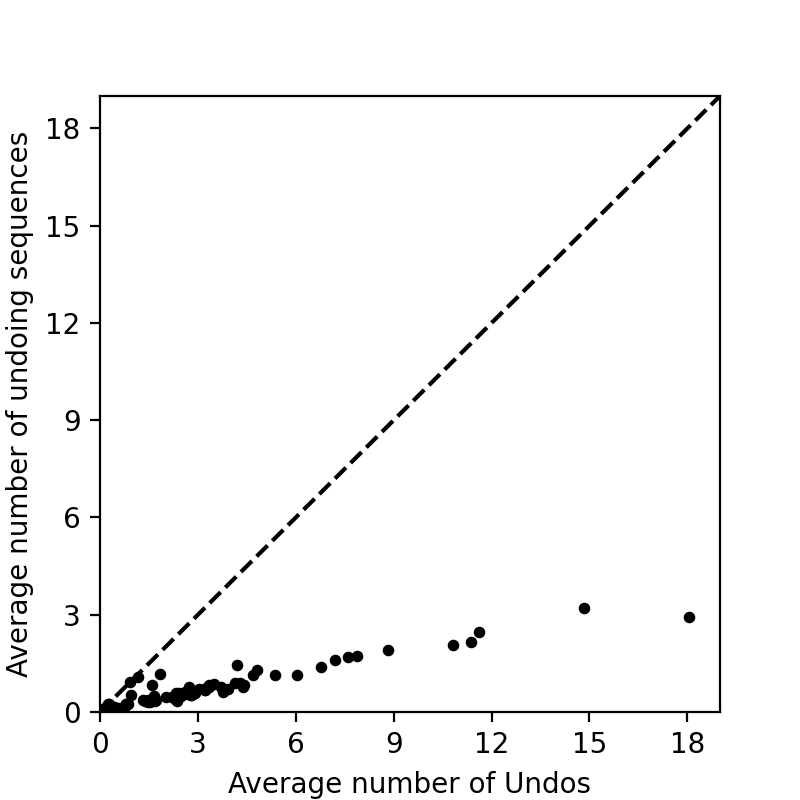

Text(0, 0.5, 'Average number of undoing sequences')

In [23]:
fig1, ax1 = plt.subplots()
ax1.plot([0,19],[0,19],'--',c='k')
ax1.scatter(undo_presses,undo_once_sequences,10,c='k')
ax1.set_xlim(0,19)
ax1.set_xticks(np.linspace(0,18,7).astype(np.int16))

ax1.set_ylim(0,19)
ax1.set_yticks(np.linspace(0,18,7).astype(np.int16))

fig1.set_figwidth(4)
fig1.set_figheight(4)

ax1.set_xlabel('Average number of Undos')
ax1.set_ylabel('Average number of undoing sequences')
# fig1.savefig(out_dir + 'undo_num_seq.png', dpi=600, bbox_inches='tight')
# fig1.savefig(out_dir + 'undo_num_seq.pdf', dpi=600, bbox_inches='tight')